 <center> <h1> <b> Pattern Recognition and Machine Learning (AI2000) </b> </h1> </center>


 <center> <h2> <b> KNN Classifier </b> </h2> </center>


<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each with a diagonal covariance matrix with diagonal elements being 0.1. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.

2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

3. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Develop a Python class named 'KNeighbourClassifier' that encapsulates the hyperparameters of a K-Nearest Neighbors (KNN) classifier, such as the number of neighbors (k) and the distance metric. Implement the following methods within this class. $\textit{fit(X_train, y_train):}$ This method should accept training data (X_train) and corresponding labels (y_train) as input. It should store these inputs as internal attributes of the class for later use in prediction. $\textit{predict(X_test):} This method should take test data (X_test) as input and return the predicted labels for the given data points using the KNN algorithm.

2. Instantiate an object of the KNeighbourClassifier class. Train the classifier on the provided training data by calling the fit() method. Use this trained classifier to predict the labels of the test data. Finally, evaluate the classifier's accuracy by comparing the predicted labels with the actual (original) labels of the test data

3. Generate a 2D scatter plot of the test data, assigning green to class 1, blue to class 2, and red to test data points whose predicted labels do not match their true labels.

4. Visualize the decision boundaries of a given classifier by generating a 2D grid and predicting the class labels for each point in the grid using the KNN algorithm. Color-code the grid points based on their predicted class labels to visually represent the decision regions

<b> Part(c): Parameter selection: What is good value for k? - </b> A common approach to finding the optimal value for the hyperparameter 'k' in K-Nearest Neighbors is through cross-validation. In this method, a portion (ρ%) of the training data is set aside as a validation set. The KNN model is then trained on the remaining data and evaluated on the validation set for a range of 'k' values. The optimal 'k' is selected as the value that results in the best performance on the validation set.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check if there is an improvement on the classification error over the result of Part (b).

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.

2. Investigate how the distribution of the training data affects the performance of the KNN algorithm. Replace the Gaussian distribution used in part (a) with a Laplacian distribution. Generate both training and testing datasets based on these distributions. Evaluate the KNN classifier's performance on both datasets. Analyze whether the KNN achieves comparable performance with both Gaussian and Laplacian distributed data. Examine the effect of changing the distance metric from $l_{2}$ to $l_{1}$ on the KNN performance for both Gaussian and Laplacian distributed datasets


<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> :

1. Use the above written KNN classifier to perform digit claissification using MNIST digit dataset.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%. The 28x28 images in the MNIST data set may be flattened to arrive at a 784 dimensional vector.
3. Use the most suitable distance metric and k to maximize the test data performance.
4. Create a confusion matrix to understand the most confused classes (digits).
5. Suggest alternate ways to improve the performance.



In [159]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

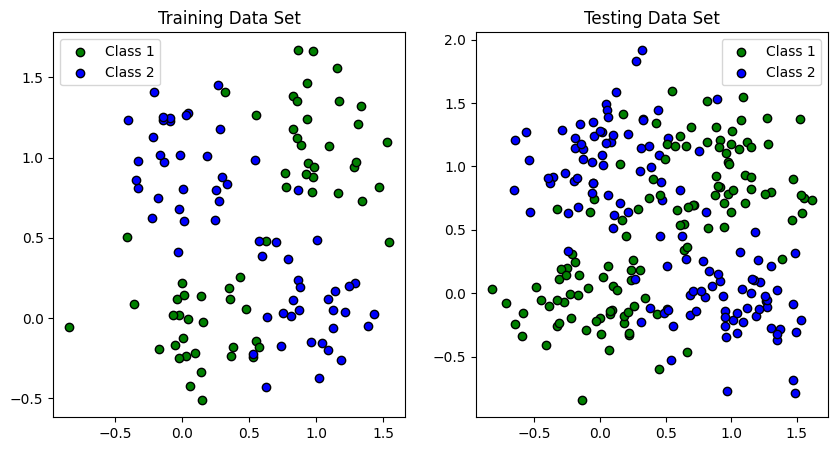

In [160]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances
mean=[[0,0],[1,0],[0,1],[1,1]]
cov=[[0.1,0],[0,0.1]]

#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
data=[np.random.multivariate_normal(m,cov,90) for m in mean ]


#Generate training data 
X_train = np.vstack([data[i][:30] for i in range(4)])
Y_train = np.hstack([[1]*30 if i == 0 or i == 3 else [-1]*30 for i in range(4)])   


#Generate testing data
X_test = np.vstack([data[i][30:] for i in range(4)])
Y_test = np.hstack([[1]*60 if i == 0 or i == 3 else [-1]*60 for i in range(4)])



#Visualize the data using plt.scatter() function
fig, (train,test) = plt.subplots(1, 2, figsize=(10, 5))
train.scatter(X_train[:30,0],X_train[:30,1],color='green',label='Class 1',edgecolors='black')
train.scatter(X_train[30:90,0],X_train[30:90,1],color='blue',label='Class 2',edgecolors='black')
train.scatter(X_train[90:120,0],X_train[90:120,1],color='green',edgecolors='black')
train.set_title('Training Data Set')
train.legend()

test.scatter(X_test[:60,0],X_test[:60,1],color='green',label='Class 1',edgecolors='black')
test.scatter(X_test[60:180,0],X_test[60:180,1],color='blue',label='Class 2',edgecolors='black')
test.scatter(X_test[180:240,0],X_test[180:240,1],color='green',edgecolors='black')
test.set_title('Testing Data Set')
test.legend()

plt.show()



The Accuracy for k=5 is 83.75


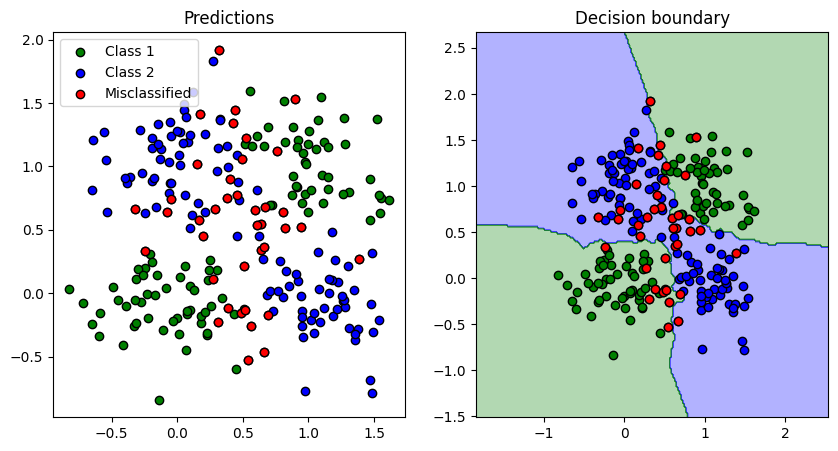

In [161]:
########################################
#Part(b) #KNN classification
########################################

#Write "kNNClassify" function
class KNeighborsClassifier:
    """
    K-Nearest Neighbors Classifier
    This class implements the k-nearest neighbors algorithm for classification.
    """
    def __init__(self, n_neighbors=5,distance_metric="l2"):
        #Initializes the KNeighborsClassifier with the specified number of neighbors. Defaults to 1.
        #Default distance_metric is L2 norm

        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = []
        self.Y_train = []

    def fit(self, X_train,Y_train):
        #This method fits the k-nearest neighbors classifier from the training data. X_train is the training data, represented as a numpy array of shape (n_samples, n_features), and Y_train is the target values of the training data, represented as a numpy array of shape (n_samples,)
        self.X_train = X_train
        self.Y_train = Y_train

    def predict(self,X_test):
        #This method predicts the class labels for a set of data samples. X_test is the data to be predicted, represented as a numpy array of shape (n_samples, n_features)
        predictions=[]
        
        for x in X_test:
            if self.distance_metric == "l2":
                distances = np.linalg.norm(self.X_train - x, axis=1)
            elif self.distance_metric == "l1":
                distances = np.sum(np.abs(self.X_train - x), axis=1)
            elif self.distance_metric == "linf":
                distances = np.max(np.abs(self.X_train - x), axis=1)
            elif self.distance_metric == "l3":
                distances = np.sum(np.abs(self.X_train - x) ** 3, axis=1) ** (1 / 3)
            else:
                raise ValueError("Unsupported metric")           
            neighbours_indices=np.argpartition(distances,self.n_neighbors)[:self.n_neighbors]
            neighbours_labels=self.Y_train[ neighbours_indices]
            class1_count = np.sum(neighbours_labels == 1)
            class2_count = np.sum(neighbours_labels == -1)
            if class1_count<class2_count:
                predictions.append(-1)
            elif class1_count>class2_count:
                predictions.append(1)
            else :
                predictions.append(np.random.choice([1,-1]))        
        return np.array(predictions)                   
            
            
        
          


#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
    correct=np.sum(true==pred)
    accuracy=(correct/len(pred) )*100
    return accuracy 
          
            



#Create a visual representation of predictions
k=5
knn=KNeighborsClassifier(k,)
knn.fit(X_train,Y_train)

predictions=knn.predict(X_test)
colors1 = ['green' if pred == 1 and true == 1  else 'blue' if pred ==-1 and true ==-1 else 'red' for pred,true in zip(predictions,Y_test)]
#colors2 = ['green' if pred == 1 else 'blue' for pred in Y_test]
colors3 = ['green' if pred == 1 else 'blue' for pred in predictions]
fig, (prediction,decision) = plt.subplots(1, 2, figsize=(10, 5))
acc_pb=KNNAccuracy(Y_test,predictions)
print(f"The Accuracy for k={k} is {acc_pb}")

#prediction.scatter(X_test[:,0],X_test[:,1],color=colors1,edgecolors='black')
prediction.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='green', label='Class 1',edgecolors='black')
prediction.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], color='blue', label='Class 2',edgecolors='black')
prediction.scatter(X_test[predictions != Y_test][:, 0], X_test[predictions != Y_test][:, 1], color='red', label='Misclassified',edgecolors='black')
prediction.set_title('Predictions')
prediction.legend()

#Generate and visualize the decision regions and overlay the test points

h=0.02
xmin, xmax = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
ymin, ymax = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
x,y=np.meshgrid(np.arange(xmin, xmax, h),np.arange(ymin, ymax, h))
datapoints=np.column_stack((x.ravel(),y.ravel()))
grid_labels=knn.predict(datapoints)
grid_labels=grid_labels.reshape(x.shape)
decision.contourf(x, y, grid_labels, alpha=0.3,cmap=ListedColormap(('blue', 'green')))
decision.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='green', label='Class 1',edgecolors='black')
decision.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], color='blue', label='Class 2',edgecolors='black')
decision.scatter(X_test[predictions != Y_test][:, 0], X_test[predictions != Y_test][:, 1], color='red', label='Misclassified',edgecolors='black')
decision.set_title('Decision boundary')
plt.show()








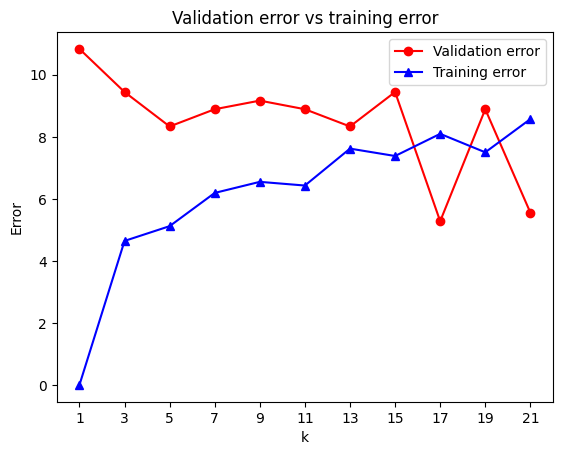

The Best value for k is 17
(part b)The Accuracy for k=5 is 83.75
The Accuracy for best k=17 is 85.0
Accuracy is more in part c compared to part b


In [162]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range,rho,X_train,Y_train):
  #Iterate through range of k values
  #Hold out rho fraction of training data in each repetition.
  mean_errors_validation=[]
  mean_errors_training=[]
  for k in k_range:
    errors_val=[]
    errors_train=[]
    for i in range(10):
      validation_data_indices=np.random.choice(len(X_train), int(rho*len(X_train)), replace=False)
      validation_data_x=X_train[validation_data_indices]
      validation_data_y=Y_train[validation_data_indices]
      
      training_data_x=np.delete(X_train,validation_data_indices,axis=0)
      training_data_y=np.delete(Y_train,validation_data_indices)
      
      k_test=KNeighborsClassifier(k,)
      k_test.fit(training_data_x,training_data_y)
      
      y_train_predicts=k_test.predict(training_data_x)
      accuraccy_train=KNNAccuracy(training_data_y,y_train_predicts)
      errors_train.append(100-accuraccy_train)
      
      y_val_predicts=k_test.predict(validation_data_x)
      accuraccy_val=KNNAccuracy(validation_data_y,y_val_predicts)
      errors_val.append(100-accuraccy_val)
      
    mean_errors_training.append(np.mean(errors_train))  
    mean_errors_validation.append(np.mean(errors_val))  
  return mean_errors_training,mean_errors_validation 
      
    


  #Return errors on training and validation data



#Plot training and validation errors for different values of k
k_range=[2*i+1 for i in range(11)]
training_errors,validation_errors=holdoutCVkNN(k_range,0.3,X_train,Y_train)
plt.plot(k_range,validation_errors,'r-o',label='Validation error')
plt.plot(k_range,training_errors,'b-^',label='Training error')
plt.xticks(k_range)
plt.xlabel("k")
plt.ylabel("Error")
plt.title("Validation error vs training error")
plt.legend()
plt.show()




#what is the best value for k?
#value with least validation error would be the best k
best_k=k_range[np.argmin(validation_errors)]
print(f"The Best value for k is {best_k}")

#Effect of rho on k
#for small value of rho the validation data is less .since we use more training data it can lead to better learning of model but the  k we get from crossvalidation will be more sensitive to specific data samples as validation data is less and hence small is not prefered. 
#for a very large value of rho the validation data is more and hence k we get from cross validation is less sentive to specific data samples.but as training data set is less we could get a underfitting model whic is not prefered 
#hence an optimal value of rho is prefered .
#as number of repitions increase varaince of errors decreases and we get a more stable estimates.

#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).
model_b=KNeighborsClassifier(best_k,)
model_b.fit(X_train,Y_train)
best_k_predicts=model_b.predict(X_test)
acc_pc=KNNAccuracy(Y_test,best_k_predicts)
print(f"(part b)The Accuracy for k={k} is {acc_pb}")
print(f"The Accuracy for best k={best_k} is {acc_pc}")

if acc_pc > acc_pb :
  print("Accuracy is more in part c compared to part b")
elif acc_pc<acc_pb:
  print("Accuracy is less in part c compared to part b")  
else:
  print("Accuracy is the same in part c as we got in part b")  




Training size: 200
Accuracy with k=5: 85.0
best k from cross validation: 15
Accuracy with best k: 86.25
 
Training size: 400
Accuracy with k=5: 86.66666666666667
best k from cross validation: 21
Accuracy with best k: 87.08333333333333
 
Training size: 800
Accuracy with k=5: 85.0
best k from cross validation: 21
Accuracy with best k: 86.66666666666667
 
L2 metric: 
Accuracy with laplace distribution: 80.83333333333333
Accuracy with gaussian distribution: 83.75


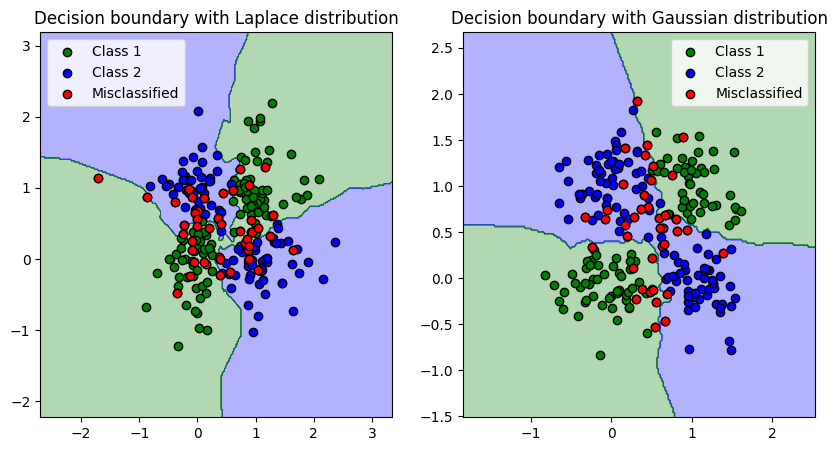

L1 metric: 
Accuracy with laplace distribution: 80.41666666666667
Accuracy with gaussian distribution: 85.0


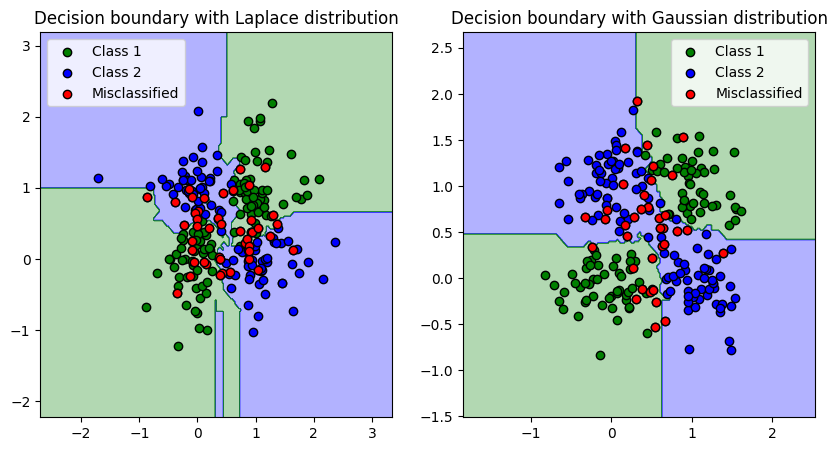

In [163]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases
k_range2 = [1,3,5,7,9,11,13,15,17,19,21]
training_sizes = [200,400,800] 
accuracy = []
good_k_pd = []
for n in training_sizes:
    print(f"Training size: {n}")
    training_data_pd = np.vstack([np.random.multivariate_normal(m,cov,n) for m in mean])
    Y_train_pd = np.hstack([[1]*n + [-1]*n + [-1]*n + [1]*n])
    
    model_d = KNeighborsClassifier(5)
    model_d.fit(training_data_pd, Y_train_pd)
    partd_predictions = model_d.predict(X_test)
    acc = KNNAccuracy(Y_test, partd_predictions)
    accuracy.append(acc)
    print(f"Accuracy with k=5: {acc}")
    
    partd_mean_t_error, partd_mean_v_error = holdoutCVkNN(k_range2, 0.3, training_data_pd, Y_train_pd)
    best_k_pd = k_range2[np.argmin(partd_mean_v_error)]
    model_d_2 = KNeighborsClassifier(best_k_pd)
    model_d_2.fit(training_data_pd, Y_train_pd)
    partd_predictions_2 = model_d_2.predict(X_test)
    acc_2 = KNNAccuracy(Y_test, partd_predictions_2)
    good_k_pd.append(best_k_pd)
    print(f"best k from cross validation: {best_k_pd}")
    print(f"Accuracy with best k: {acc_2}")
    print(" ")
#as training data size increases a higher value of k is generally prefered to avoid underfiting
# stabilty of the solution depends on the random points we choose ,but in general as we increase training data set we get more stable results
#as training data size increases the accuracy of the model increases as the model is able to learn more from the data set


#Performance evaluation with different data distributions, i.e., Gaussian, Laplacian

def multivariate_laplacian(mean, cov, size=1):
    mean = np.asarray(mean)
    cov = np.asarray(cov)
    d = mean.shape[0]
    laplace_noise = np.random.laplace(loc=0, scale=1, size=(size, d))
    L = np.linalg.cholesky(cov)  
    transformed_samples = laplace_noise @ L.T  
    return transformed_samples + mean


data_lap=[multivariate_laplacian(m,cov,90) for m in mean ]

X_train_lap = np.vstack([data_lap[i][:30] for i in range(4)])
Y_train_lap = np.hstack([[1]*30 if i == 0 or i == 3 else [-1]*30 for i in range(4)])   

X_test_lap = np.vstack([data_lap[i][30:] for i in range(4)])
Y_test_lap = np.hstack([[1]*60 if i == 0 or i == 3 else [-1]*60 for i in range(4)])

l2_knn=KNeighborsClassifier(5,"l2")
l2_knn.fit(X_train,Y_train)
l2_predictions=l2_knn.predict(X_test)

lap_knn=KNeighborsClassifier(k,)
lap_knn.fit(X_train_lap,Y_train_lap)
lap_predictions_testing=lap_knn.predict(X_test_lap)
accuracy_lap_on_testing=KNNAccuracy(Y_test_lap,lap_predictions_testing)

l1_knn=KNeighborsClassifier(5,"l1")
l1_knn.fit(X_train,Y_train)
l1_predictions=l1_knn.predict(X_test)

lap_knn_l1=KNeighborsClassifier(k,'l1')
lap_knn_l1.fit(X_train_lap,Y_train_lap)
lap_predictions_testing_l1=lap_knn_l1.predict(X_test_lap)
accuracy_lap_on_testing_l1=KNNAccuracy(Y_test_lap,lap_predictions_testing_l1)

print(f"L2 metric: ")
print(f"Accuracy with laplace distribution: {accuracy_lap_on_testing}")
print(f"Accuracy with gaussian distribution: {KNNAccuracy(Y_test,l2_predictions)}")

fig, (x1,x2) = plt.subplots(1, 2, figsize=(10, 5))
h=0.02
xmin_lap, xmax_lap = X_test_lap[:, 0].min() - 1, X_test_lap[:, 0].max() + 1
ymin_lap, ymax_lap = X_test_lap[:, 1].min() - 1, X_test_lap[:, 1].max() + 1
x_lap,y_lap=np.meshgrid(np.arange(xmin_lap, xmax_lap, h),np.arange(ymin_lap, ymax_lap, h))
datapoints_lap=np.column_stack((x_lap.ravel(),y_lap.ravel()))
colors_lap = ['green' if pred == 1 else 'blue' for pred in lap_predictions_testing]
grid_labels_lap=lap_knn.predict(datapoints_lap)
grid_labels_lap=grid_labels_lap.reshape(x_lap.shape)
x1.contourf(x_lap, y_lap, grid_labels_lap, alpha=0.3,cmap=ListedColormap(('blue', 'green')))
x1.scatter(X_test_lap[Y_test_lap == 1][:, 0], X_test_lap[Y_test_lap == 1][:, 1], color='green', label='Class 1',edgecolors='black')
x1.scatter(X_test_lap[Y_test_lap == -1][:, 0], X_test_lap[Y_test_lap == -1][:, 1], color='blue', label='Class 2',edgecolors='black')
x1.scatter(X_test_lap[lap_predictions_testing != Y_test_lap][:, 0], X_test_lap[lap_predictions_testing != Y_test_lap][:, 1], color='red', label='Misclassified',edgecolors='black')
x1.set_title('Decision boundary with Laplace distribution')
x1.legend()
grid_labels_l2=l2_knn.predict(datapoints)
grid_labels_l2=grid_labels_l2.reshape(x.shape)
x2.contourf(x, y, grid_labels_l2, alpha=0.3,cmap=ListedColormap(('blue', 'green')))
x2.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='green', label='Class 1',edgecolors='black')
x2.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], color='blue', label='Class 2',edgecolors='black')
x2.scatter(X_test[l2_predictions != Y_test][:, 0], X_test[l2_predictions != Y_test][:, 1], color='red', label='Misclassified',edgecolors='black')
x2.set_title('Decision boundary with Gaussian distribution')
x2.legend()
plt.show()

print(f"L1 metric: ")
print(f"Accuracy with laplace distribution: {accuracy_lap_on_testing_l1}")
print(f"Accuracy with gaussian distribution: {KNNAccuracy(Y_test,l1_predictions)}")

fig, (y1,y2) = plt.subplots(1, 2, figsize=(10, 5))
colors_lap_l1 = ['green' if pred == 1 else 'blue' for pred in lap_predictions_testing_l1]
grid_labels_lap_l1=lap_knn_l1.predict(datapoints_lap)
grid_labels_lap_l1=grid_labels_lap_l1.reshape(x_lap.shape)
y1.contourf(x_lap, y_lap, grid_labels_lap_l1, alpha=0.3,cmap=ListedColormap(('blue', 'green')))
#y1.scatter(X_test_lap[:,0],X_test_lap[:,1],color=colors_lap_l1,edgecolors='black')
y1.scatter(X_test_lap[Y_test_lap == 1][:, 0], X_test_lap[Y_test_lap == 1][:, 1], color='green', label='Class 1',edgecolors='black')
y1.scatter(X_test_lap[Y_test_lap == -1][:, 0], X_test_lap[Y_test_lap == -1][:, 1], color='blue', label='Class 2',edgecolors='black')
y1.scatter(X_test_lap[lap_predictions_testing_l1 != Y_test_lap][:, 0], X_test_lap[lap_predictions_testing_l1 != Y_test_lap][:, 1], color='red', label='Misclassified',edgecolors='black')
y1.set_title('Decision boundary with Laplace distribution')
y1.legend()
grid_labels_l1=l1_knn.predict(datapoints)
grid_labels_l1=grid_labels_l1.reshape(x.shape)
y2.contourf(x, y, grid_labels_l1, alpha=0.3,cmap=ListedColormap(('blue', 'green')))
y2.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='green', label='Class 1',edgecolors='black')
y2.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], color='blue', label='Class 2',edgecolors='black')
y2.scatter(X_test[l1_predictions != Y_test][:, 0], X_test[l1_predictions != Y_test][:, 1], color='red', label='Misclassified',edgecolors='black')
y2.set_title('Decision boundary with Gaussian distribution')
y2.legend()
plt.show()







The Accuracy with L1 Distance metric is 85.0
The Accuracy with L2 Distance metric is 83.75
The Accuracy with L3 Distance metric is 83.75
The Accuracy with Linf Distance metric is 84.16666666666667


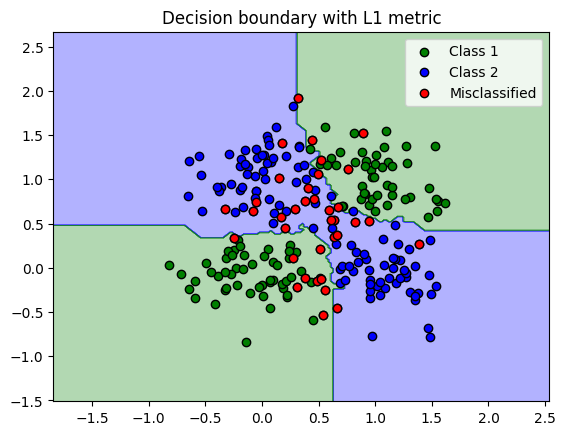

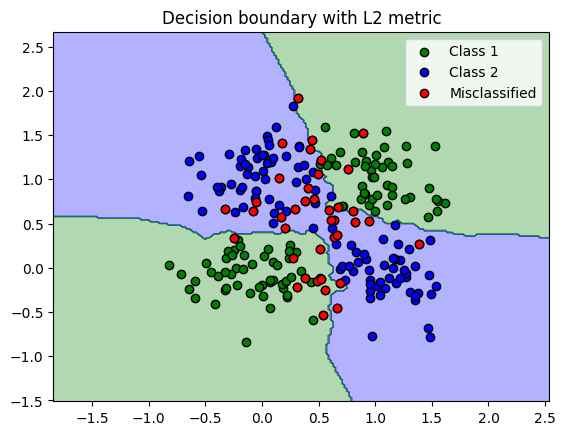

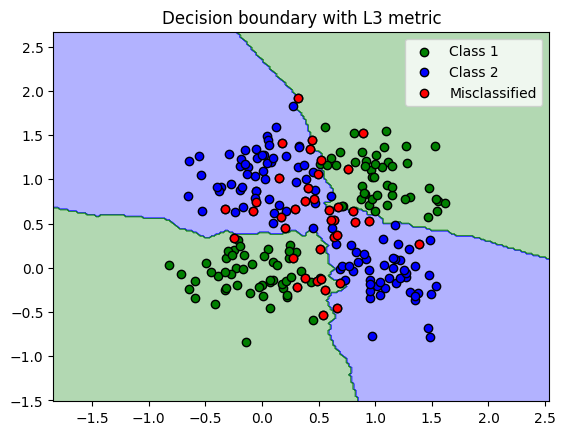

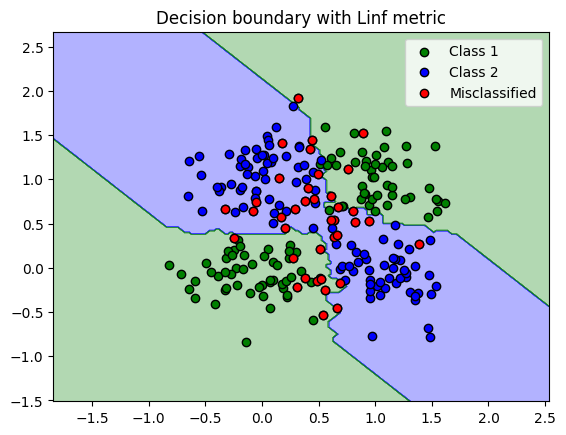

In [164]:
##################################
#Part(e): Influence of distance metric on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance metric

print(f"The Accuracy with L1 Distance metric is {KNNAccuracy(Y_test,l1_predictions)}")
print(f"The Accuracy with L2 Distance metric is {KNNAccuracy(Y_test,l2_predictions)}")

l3_knn=KNeighborsClassifier(5,"l3")
l3_knn.fit(X_train,Y_train)
l3_predictions=l3_knn.predict(X_test)
print(f"The Accuracy with L3 Distance metric is {KNNAccuracy(Y_test,l3_predictions)}")

linf_knn=KNeighborsClassifier(5,"linf")
linf_knn.fit(X_train,Y_train)
linf_predictions=linf_knn.predict(X_test)
print(f"The Accuracy with Linf Distance metric is {KNNAccuracy(Y_test,linf_predictions)}")




#Understand the decision regions of KNN classifier with different distance metric
h=0.02
xmin, xmax = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
ymin, ymax = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
x,y=np.meshgrid(np.arange(xmin, xmax, h),np.arange(ymin, ymax, h))
datapoints=np.column_stack((x.ravel(),y.ravel()))

grid_labels_l1=l1_knn.predict(datapoints)
grid_labels_l1=grid_labels_l1.reshape(x.shape)
plt.contourf(x, y, grid_labels_l1, alpha=0.3,cmap=ListedColormap(('blue', 'green')))
plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='green', label='Class 1',edgecolors='black')
plt.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], color='blue', label='Class 2',edgecolors='black')
plt.scatter(X_test[l1_predictions != Y_test][:, 0], X_test[l1_predictions != Y_test][:, 1], color='red', label='Misclassified',edgecolors='black')
plt.title('Decision boundary with L1 metric')
plt.legend()
plt.show()

grid_labels_l2=l2_knn.predict(datapoints)
grid_labels_l2=grid_labels_l2.reshape(x.shape)
plt.contourf(x, y, grid_labels_l2, alpha=0.3,cmap=ListedColormap(('blue', 'green')))
plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='green', label='Class 1',edgecolors='black')
plt.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], color='blue', label='Class 2',edgecolors='black')
plt.scatter(X_test[l2_predictions != Y_test][:, 0], X_test[l2_predictions != Y_test][:, 1], color='red', label='Misclassified',edgecolors='black')
plt.title('Decision boundary with L2 metric')
plt.legend()
plt.show()

grid_labels_l3=l3_knn.predict(datapoints)
grid_labels_l3=grid_labels_l3.reshape(x.shape)
plt.contourf(x, y, grid_labels_l3, alpha=0.3,cmap=ListedColormap(('blue', 'green')))
plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='green', label='Class 1',edgecolors='black')
plt.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], color='blue', label='Class 2',edgecolors='black')
plt.scatter(X_test[l3_predictions != Y_test][:, 0], X_test[l3_predictions != Y_test][:, 1], color='red', label='Misclassified',edgecolors='black')
plt.title('Decision boundary with L3 metric')
plt.legend()
plt.show()

grid_labels_linf=linf_knn.predict(datapoints)
grid_labels_linf=grid_labels_linf.reshape(x.shape)
plt.contourf(x, y, grid_labels_linf, alpha=0.3,cmap=ListedColormap(('blue', 'green')))
plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], color='green', label='Class 1',edgecolors='black')
plt.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], color='blue', label='Class 2',edgecolors='black')
plt.scatter(X_test[linf_predictions != Y_test][:, 0], X_test[linf_predictions != Y_test][:, 1], color='red', label='Misclassified',edgecolors='black')
plt.title('Decision boundary with Linf metric')
plt.legend()
plt.show()




for k=1,metric=l1 accuracy is 82.39999999999999
for k=1,metric=l2 accuracy is 82.0
for k=1,metric=l3 accuracy is 83.6
for k=3,metric=l1 accuracy is 83.0
for k=3,metric=l2 accuracy is 84.0
for k=3,metric=l3 accuracy is 84.6
for k=5,metric=l1 accuracy is 81.8
for k=5,metric=l2 accuracy is 83.6
for k=5,metric=l3 accuracy is 84.6
for k=7,metric=l1 accuracy is 82.0
for k=7,metric=l2 accuracy is 83.0
for k=7,metric=l3 accuracy is 84.0
for k=9,metric=l1 accuracy is 79.4
for k=9,metric=l2 accuracy is 82.0
for k=9,metric=l3 accuracy is 83.0
for k=11,metric=l1 accuracy is 79.0
for k=11,metric=l2 accuracy is 81.6
for k=11,metric=l3 accuracy is 82.39999999999999
for k=13,metric=l1 accuracy is 78.60000000000001
for k=13,metric=l2 accuracy is 80.0
for k=13,metric=l3 accuracy is 81.6
for k=15,metric=l1 accuracy is 78.2
for k=15,metric=l2 accuracy is 80.2
for k=15,metric=l3 accuracy is 81.2
for k=17,metric=l1 accuracy is 76.6
for k=17,metric=l2 accuracy is 78.8
for k=17,metric=l3 accuracy is 80.600000

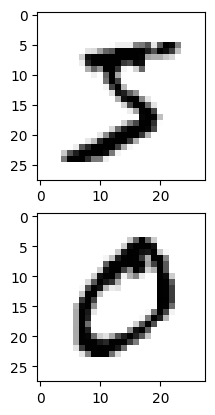

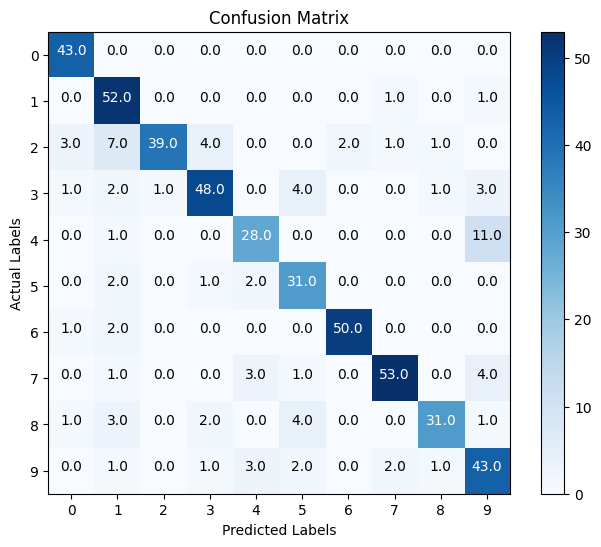

In [165]:
##################################
#Part(f): MNIST Digit classification using KNN classifier
##################################

#Load MNIST data
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()
#Plot a few images
plt.subplot(211)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

#Create train, validation and test splits
indices=np.random.permutation(len(images))
train_size=int(len(images)*0.8)
val_size=int(len(images)*0.1)
train_indices=indices[:train_size]
val_indices=indices[train_size:train_size+val_size]
test_indices=indices[train_size+val_size:]
X_train_pf=images[train_indices]
Y_train_pf=targets[train_indices]
X_val_pf=images[val_indices]
Y_val_pf=targets[val_indices]
X_test_pf=images[test_indices]
Y_test_pf=targets[test_indices]

#Write 'MultiClassKNNClassify' function
class MultiClassKNNClassifier:
    def __init__(self, n_neighbors=5,distance_metric="l2"):
        #Initializes the KNeighborsClassifier with the specified number of neighbors. Defaults to 1.
        #Default distance_metric is L2 norm

        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = []
        self.Y_train = []

    def fit(self, X_train,Y_train):
        #This method fits the k-nearest neighbors classifier from the training data. X_train is the training data, represented as a numpy array of shape (n_samples, n_features), and Y_train is the target values of the training data, represented as a numpy array of shape (n_samples,)
        self.X_train = X_train
        self.Y_train = Y_train

    def predict(self,X_test):
        #This method predicts the class labels for a set of data samples. X_test is the data to be predicted, represented as a numpy array of shape (n_samples, n_features)
        predictions=[]
        
        for x in X_test:
            if self.distance_metric == "l2":
                distances = np.linalg.norm(self.X_train - x, axis=1)
            elif self.distance_metric == "l1":
                distances = np.sum(np.abs(self.X_train - x), axis=1)
            elif self.distance_metric == "linf":
                distances = np.max(np.abs(self.X_train - x), axis=1)
            elif self.distance_metric == "l3":
                distances = np.sum(np.abs(self.X_train - x) ** 3, axis=1) ** (1 / 3)
            else:
                raise ValueError("Unsupported metric")           
            neighbours_indices=np.argpartition(distances,self.n_neighbors)[:self.n_neighbors]
            neighbours_labels=self.Y_train[ neighbours_indices]
            unique_labels, counts = np.unique(neighbours_labels, return_counts=True)
            pred=unique_labels[np.argmax(counts)]
            predictions.append(pred)
        return np.array(predictions)    
            



#Empirically chose most suitable k and distance metric based on the evauation on cross-validation data
sample_size=500
sample_X_train=X_train_pf[:sample_size]
sample_Y_train=Y_train_pf[:sample_size]
sample_X_val=X_val_pf[:sample_size]
sample_Y_val=Y_val_pf[:sample_size]
k_range3=[1,3,5,7,9,11,13,15,17,19,21]
metrics=["l1","l2","l3"]
best_accuracy_mnist=0
best_k_mnist=1
best_metric_mnist="l2"

for k in k_range3:
    for m in metrics:
        knn_mnist=MultiClassKNNClassifier(k, m)
        knn_mnist.fit(sample_X_train,sample_Y_train)
        predictions_mnist=knn_mnist.predict(sample_X_val)
        accuracy_mnist=np.mean(predictions_mnist==sample_Y_val)*100
        print(f"for k={k},metric={m} accuracy is {accuracy_mnist}")
        if accuracy_mnist>best_accuracy_mnist:
            best_accuracy_mnist=accuracy_mnist
            best_k_mnist=k
            best_metric_mnist=m

print(f"\nBest parameters: k={best_k_mnist}, metric={best_metric_mnist}, validation accuracy={best_accuracy_mnist}")            



#Evaluate the performance on test data with the best hyper parameters ( k, distance metric ) obtained from cross validation

knn_mnist2=MultiClassKNNClassifier(best_k_mnist,best_metric_mnist)
knn_mnist2.fit(sample_X_train,sample_Y_train)
predictions_mnist2=knn_mnist2.predict(X_test_pf[:sample_size])
accuracy_mnist2=np.mean(predictions_mnist2==Y_test_pf[:sample_size])*100
print(f"Accuracy on test data={accuracy_mnist2}")


#Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    #Inputs: Ground truth labels and classifier predictions
    #Outputs: Confusion matrix
    #Confusion matrix: A confusion matrix is a table that summarizes the performance of a classification model by comparing its predictions to the actual ground truth values
    #Rows: Represent the actual class labels
    #Columns: Represent the predicted class labels
    x = np.unique(true)
    no_of_classes = len(x)
    c_matrix = np.zeros((no_of_classes, no_of_classes)) 
    y = {label: i for i, label in enumerate(x)}
    for t, p in zip(true, pred):
        c_matrix[y[t]][y[p]] += 1 
    return c_matrix, x
confusionmatrix,labels=compute_confusion_matrix(Y_test_pf[:sample_size],predictions_mnist2)

plt.figure(figsize=(8, 6))
plt.imshow(confusionmatrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, str(confusionmatrix[i, j]), horizontalalignment="center", color="white" if confusionmatrix[i, j] > confusionmatrix.max() / 2 else "black")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()
#Suggest an alternative ways to improve performance
#could use better metrics and other methods to find best k values.



<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution
 90%
2. Write down the best accuracy on MNIST validation and test data.  
85%
1. Report your observations on the confusion matrix of KNN classifier on MNIST test data.    
High accuracy for 1,6,7 digitd and low accuracy for 4,8,2 digits .hence model might not be able to classfy them.